In [ ]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('C:\Kate\Python\ClaimPrediction\Data\\fdata_v1_encd.csv', index_col=None)

In [3]:
target_column='hasclaim'
native_features=[
 'manufacturer_encd',
 'model_encd',
 'registrationstateprovcd_encd',
 'vehbodytypecd_encd',
 'performancecd_encd',
 'restraintcd_encd',
 'antitheftcd_encd',
 'enginecylinders_encd',
 'vehusecd_encd',
 'classcd_encd',
 'carpoolind_encd',
 'daylightrunninglightsind_encd',
 'passiveseatbeltind_encd',
 'programtypecd_encd',
 'driverstatuscd_encd',
 'licensedstateprovcd_encd',
 'relationshiptoinsuredcd_encd',
 'scholasticdiscountind_encd',
 'mvrstatus_encd',
 'maturedriverind_encd',
 'drivertrainingind_encd',
 'gooddriverind_encd',
 'accidentpreventioncourseind_encd',
 'persontypecd_encd',
 'gendercd_encd',
 'maritalstatuscd_encd',
 'occupationclasscd_encd',
 #
 'garageterritory',
 'vehnumber',
 'drivernumber',
 'viol_pointschargedterm',
 'acci_pointschargedterm',
 'viol_driverpointsnumbercountterm',
 'acci_driverpointsnumbercountterm',
 'viol_infractioncdcountterm',
 'acci_infractioncdcountterm',
 'viol_last_infractionage',
 'acci_last_infractionage',
 'viol_last_convictionage',
 'acci_last_convictionage',
 'enginesize',
 'enginehorsepower',
 #
 'vehicleage',
 'ratingvalue',
 'estimatedannualdistance',
 'odometerreading',
 'daysperweekdriven',
 'driverage',
 'havelicenseage',
 'mvrstatusage'
]
#some native features are replaced with external plus few external features in addition
external_features=[
 'external_make_encd',
 'external_model_encd',
 'registrationstateprovcd_encd',
 'vehbodytypecd_encd',
 'performancecd_encd',
 'restraintcd_encd',
 'antitheftcd_encd',
 'enginecylinders_encd',
 'vehusecd_encd',
 'classcd_encd',
 'carpoolind_encd',
 'daylightrunninglightsind_encd',
 'passiveseatbeltind_encd',
 'programtypecd_encd',
 'driverstatuscd_encd',
 'licensedstateprovcd_encd',
 'relationshiptoinsuredcd_encd',
 'scholasticdiscountind_encd',
 'mvrstatus_encd',
 'maturedriverind_encd',
 'drivertrainingind_encd',
 'gooddriverind_encd',
 'accidentpreventioncourseind_encd',
 'persontypecd_encd',
 'gendercd_encd',
 'maritalstatuscd_encd',
 'occupationclasscd_encd',
 #
 'garageterritory',
 'vehnumber',
 'drivernumber',
 'viol_pointschargedterm',
 'acci_pointschargedterm',
 'viol_driverpointsnumbercountterm',
 'acci_driverpointsnumbercountterm',
 'viol_infractioncdcountterm',
 'acci_infractioncdcountterm',
 'viol_last_infractionage',
 'acci_last_infractionage',
 'viol_last_convictionage',
 'acci_last_convictionage',
 'external_engine',
 'enginehorsepower',
 #
 'modelscore',
 'external_length_in',
 'external_width_in',
 'external_height_in',
 'external_vehicleage',
 'ratingvalue',
 'estimatedannualdistance',
 'odometerreading',
 'daysperweekdriven',
 'driverage',
 'havelicenseage',
 'mvrstatusage'
]

In [18]:
print 'Number of Native Features:%s'%len(native_features)

number of Native Features:50


In [19]:
print 'Number of External Features:%s'%len(external_features)

Number of Native Features:54


We do have 50 features in the original dataset plus few more from external sources. 
Do we need all of them to predict claims?

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# For Visualization
import matplotlib.pyplot as plt
import matplotlib
from math import sqrt
import seaborn as sns
#3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline

In [25]:
def pca_viz(num_components,cum_var_exp,var_exp):
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(10, 8))

        plt.bar(range(num_components), var_exp, alpha=0.5, align='center',
                label='individual explained variance')
        plt.step(range(num_components), cum_var_exp, where='mid',
                 label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best')
        plt.tight_layout()

In [6]:
Features=dataset.loc[:,native_features]

Standardizing For PCA we need to scale the data so that the distribution of the indicators is centered around 0 with a standard deviation of 1

In [7]:
scaler = StandardScaler().fit(Features)
Values_Scaled = scaler.transform(Features)

print(Values_Scaled[:,0].mean())  
print(Values_Scaled[:,0].std())  

-2.13899705212e-18
1.0


How many principal components are we going to choose for our new feature subspace?

In [31]:
var_exp=[]
cum_var_exp=[]
pca = PCA(n_components=10)
pca.fit(Values_Scaled)
var_exp=pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print 'Explained variance: %s'%round(pca.explained_variance_ratio_.sum()*100)

Explained variance: 54.0


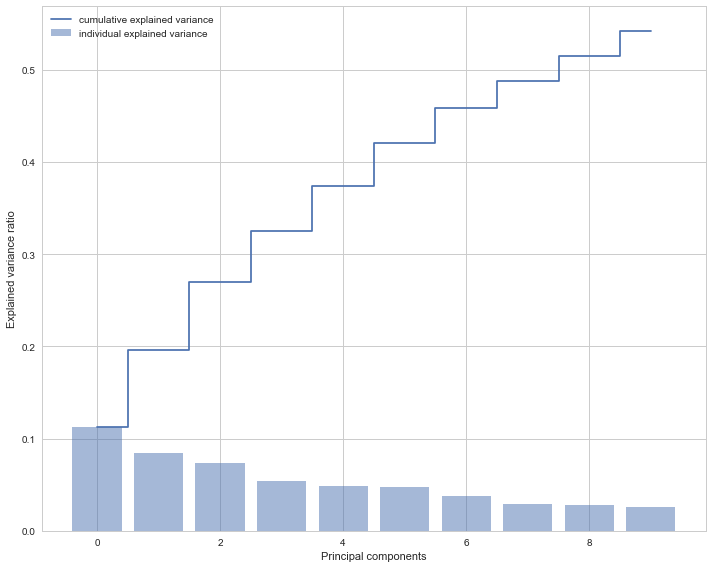

In [32]:
pca_viz(10,cum_var_exp,var_exp)

The plot shows the first principal component alone explains only ~12% of variance. 

Together first 10 components explains only 55% of the information. It is not safe to drop the rest of the components to get a useful model.

How many components do we need to explain 95% of variance?

In [33]:
var_exp=[]
cum_var_exp=[]
pca = PCA(n_components=20)
pca.fit(Values_Scaled)
var_exp=pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print 'Explained variance: %s'%round(pca.explained_variance_ratio_.sum()*100)

Explained variance: 75.0


In [34]:
var_exp=[]
cum_var_exp=[]
pca = PCA(n_components=40)
pca.fit(Values_Scaled)
var_exp=pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print 'Explained variance: %s'%round(pca.explained_variance_ratio_.sum()*100)

Explained variance: 98.0


We need 40 components to explain more then 98% of variance which is very close to the original features set. I do not see any sense in PCA use.

Let's then just visaulize our data

In [35]:
#heatmap visualization
def heatmap(data):
  fig, ax = plt.subplots(figsize=(10, 10))
  heatmap = sns.heatmap(data, cmap=plt.cm.Blues, center=0, linewidths=0.5, 
                  vmin=-1, vmax=1,annot=True, annot_kws={"size": 8})
  ax.xaxis.tick_top()  
# rotate
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  plt.tight_layout()
 # Biplots
# Thanks to  DR-Rodriguez
# https://www.kaggle.com/strakul5/d/abcsds/pokemon/principal-component-analysis-of-pokemon-data
def pca_biplot(x_pc=0, y_pc=1, max_arrow=0.2, xlim=1, ylim=1):
    n = pc.shape[1]
    sns.set(style="ticks", palette="muted", color_codes=True)
    
    g = sns.lmplot(x='PC{}'.format(x_pc + 1), y='PC{}'.format(y_pc + 1),  data=pc_scores,
                   fit_reg=False, size=8,  scatter_kws={'alpha':0.3})
    for i in range(n):
        # Only plot the longer ones
        length = sqrt(pc.iloc[x_pc, i] ** 2 + pc.iloc[y_pc, i] ** 2)
        if length < max_arrow:
            continue
        plt.arrow(0, 0, pc.iloc[x_pc, i], pc.iloc[y_pc, i], color='k', alpha=1)
        plt.text(pc.iloc[x_pc, i] * 1.15, pc.iloc[y_pc, i] * 1.15,
                 pc.columns.tolist()[i], color='k', ha='center', va='center')
    g.set(ylim=(-ylim, ylim))
    g.set(xlim=(-xlim, xlim))

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
         FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
         self._verts3d = xs, ys, zs
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
def pca_3Dplot(x_pc=0, y_pc=1, z_pc=2, max_arrow=0.2, xlim=1, ylim=1, zlim=1):        
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=50)
    sns.set(style="ticks", palette="muted", color_codes=True)

    ax.scatter(pc_scores.iloc[:, x_pc], pc_scores.iloc[:, y_pc], pc_scores.iloc[:, z_pc], 
           cmap='plt.cm.Paired')
    n = pc.shape[1]
    for i in range(n):
        length = sqrt(pc.iloc[0, i] ** 2 + pc.iloc[1, i] ** 2+pc.iloc[2, i] ** 2)
        if length < max_arrow:
            continue
        a = Arrow3D([0, pc.iloc[0, i]], [0, pc.iloc[1, i]], 
                [0, pc.iloc[2, i]], mutation_scale=20, 
                lw=2, arrowstyle="-|>", color="r")
        ax.add_artist(a)
        ax.text(x=pc.iloc[x_pc, i]*1.15, y=pc.iloc[y_pc, i]*1.15, z=pc.iloc[z_pc, i]*1.15,
                 s=pc.columns.tolist()[i],color='k', ha='center', va='center')
    ax.set_title("Three PCA directions")
    ax.set_xlabel('PC{}'.format(x_pc + 1))
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel('PC{}'.format(y_pc + 1))
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel('PC{}'.format(z_pc + 1))
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlim3d(-xlim, xlim)
    ax.set_ylim3d(-ylim, ylim)
    ax.set_zlim3d(-zlim, zlim)

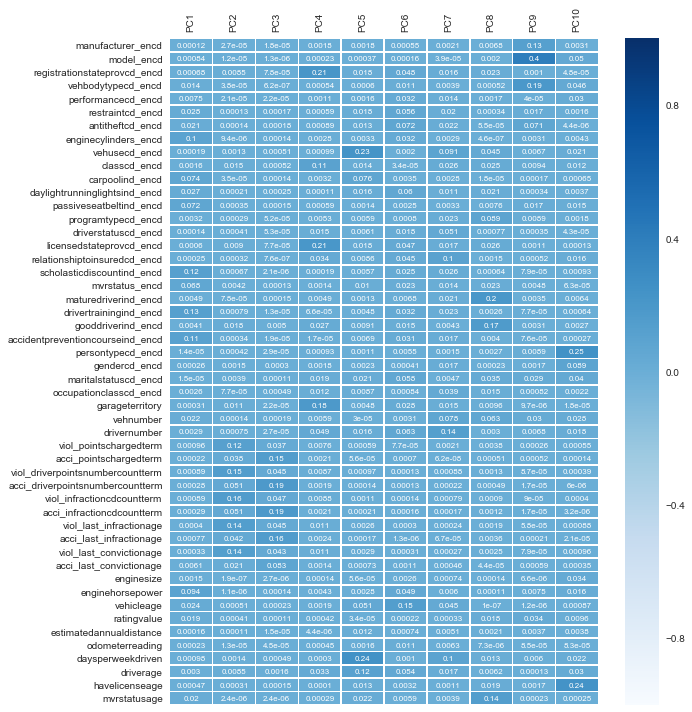

In [38]:
pca = PCA(n_components=10)
pc_scores = pd.DataFrame(pca.fit_transform(Values_Scaled))
pc_scores.columns = ['PC'+str(i+1) for i in range(len(pc_scores.columns))]
#principal components
pc = pd.DataFrame(pca.components_, columns=native_features)
pc.index = ['PC'+str(i+1) for i in range(len(pc_scores.columns))]
heatmap(pc.transpose()**2)

As you can see, the correlation between features and principal components is very low. But still we can see some dependencies.

PC4 was built from GEO information:

License State Prov
Registration State Prov
GarageTerritory
The coefficient is very low 0.21 but more then for other features

If the features are highly correlated, their directions should be close or even the same. Like in PC9: model and vehicle body type

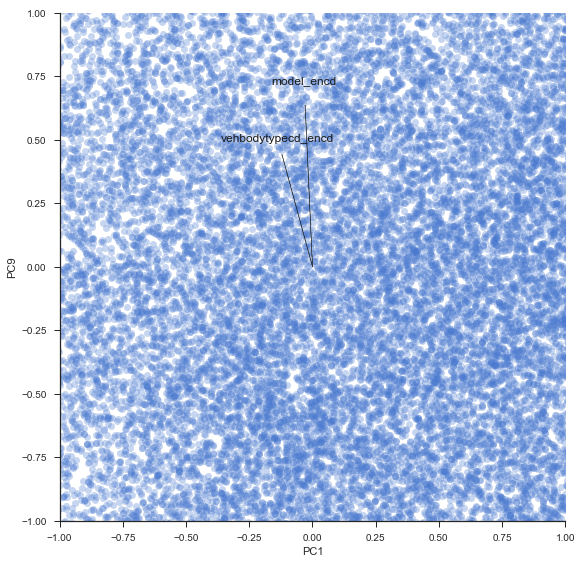

In [51]:
pca_biplot( 0, 8, max_arrow=0.4)

Principal components values

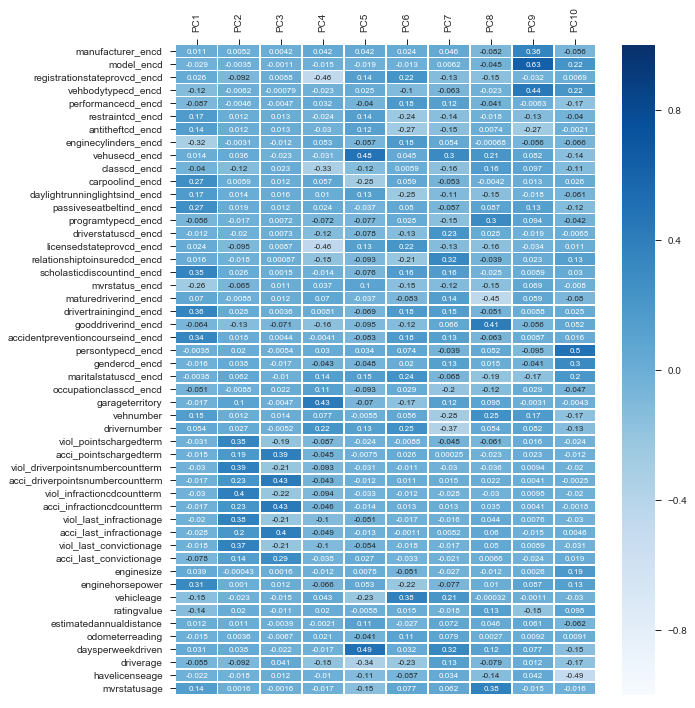

In [41]:
heatmap(pc.transpose())

If the indicators are uncorrelated, their directions should be orthogonal

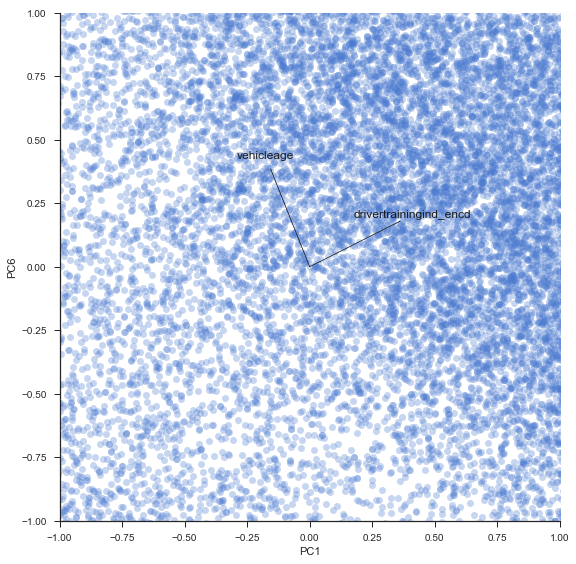

In [57]:
pca_biplot( 0, 5, max_arrow=0.4)

##2D Visulization of the whole dataset

In [58]:
#Target Column
y=dataset.loc[:,target_column].values

In [59]:
# 2 PCA components
pca = PCA(n_components=2)
X_vis = pca.fit_transform(Values_Scaled)

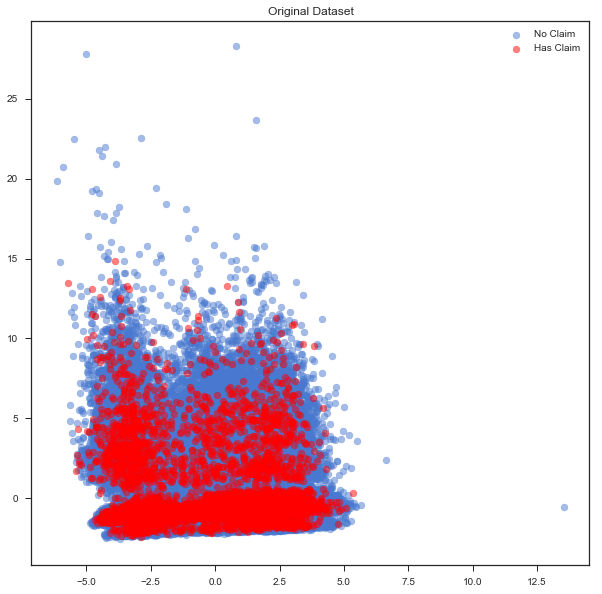

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="No Claim",
                 alpha=0.5)
plt.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Has Claim",
                 alpha=0.5, c='red')
plt.title("Original Dataset")
plt.legend()

###Reduced dataset

In [61]:
from imblearn.under_sampling import RandomUnderSampler

In [65]:
rus = RandomUnderSampler(return_indices=True, random_state=42)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(Features, y)
Values_resampled_Scaled = scaler.transform(X_resampled)

In [66]:
# 2 PCA Componets
pca = PCA(n_components=2)
X_res_vis = pca.fit_transform(Values_resampled_Scaled)

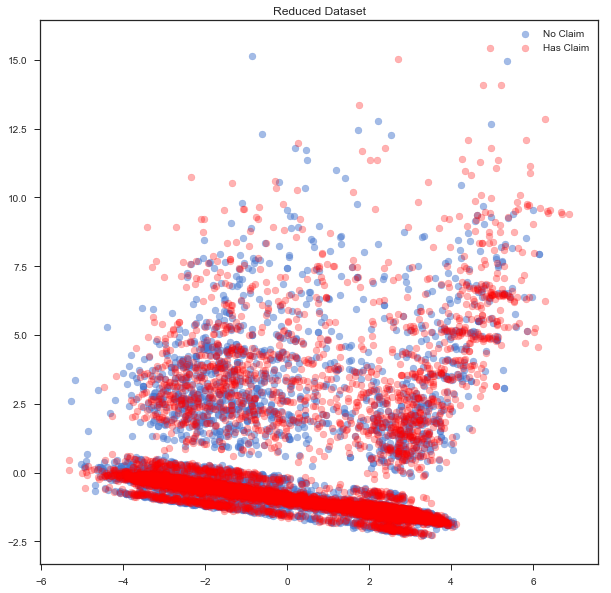

In [67]:
plt.figure(figsize=(10,10))
plt.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1], label="No Claim",
                 alpha=0.5)
plt.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1], label="Has Claim",
                 alpha=0.3, c='red')
plt.title("Reduced Dataset")
plt.legend()

##3D Visualization

In [68]:
# 3 PCA components
pca = PCA(n_components=3)
X_vis = pca.fit_transform(Values_Scaled)

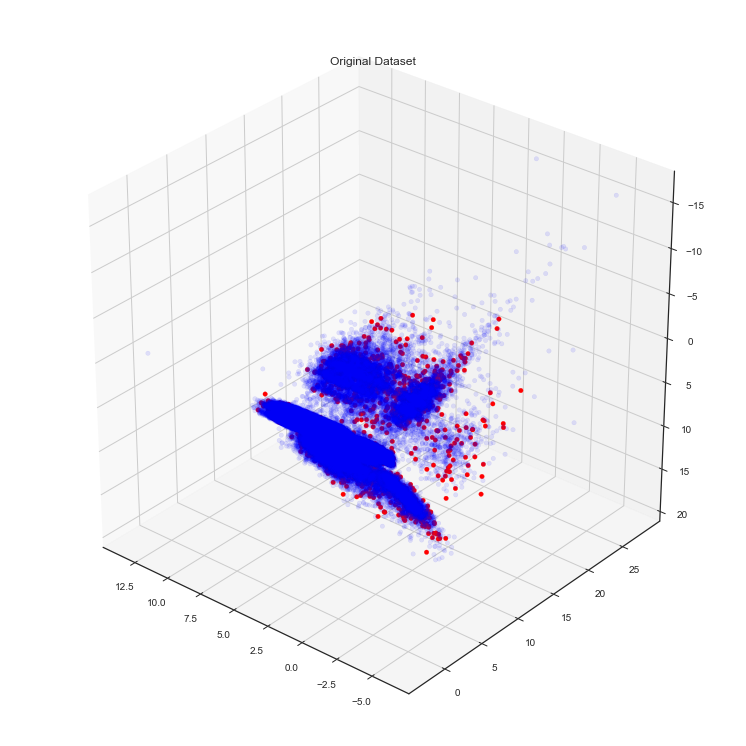

In [70]:
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig, elev=-150, azim=50)
sns.set(style="ticks", palette="muted", color_codes=True)

ax.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], X_vis[y == 0, 2], 
           cmap='plt.cm.Paired', color='blue', alpha=0.1)
ax.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], X_vis[y == 1, 2], 
           cmap='plt.cm.Paired', color='red', alpha=1)
ax.set_title("Original Dataset")

In [71]:
#3 PCA Components for reduced dataset
pca = PCA(n_components=3)
X_res_vis = pca.fit_transform(Values_resampled_Scaled)

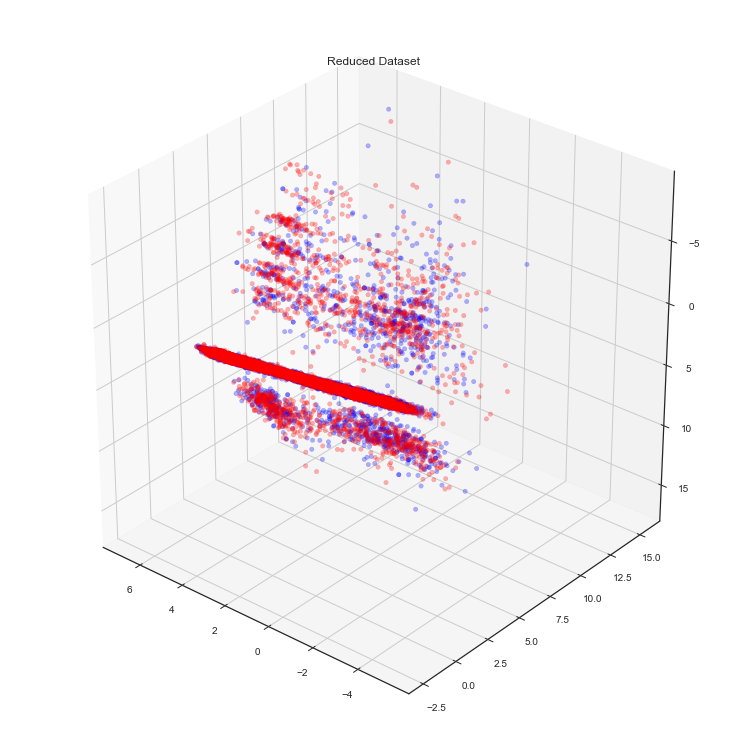

In [72]:
#Visualization
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig, elev=-150, azim=50)
sns.set(style="ticks", palette="muted", color_codes=True)

ax.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1], X_res_vis[y_resampled == 0, 2], 
           cmap='plt.cm.Paired', color='blue', alpha=0.3)
ax.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1], X_res_vis[y_resampled == 1, 2], 
           cmap='plt.cm.Paired', color='red', alpha=0.3)
ax.set_title("Reduced Dataset")